In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets as d

In [2]:
(x, y) = d.make_moons(200, noise=0.2)

In [3]:
x.shape, y.shape

((200, 2), (200,))

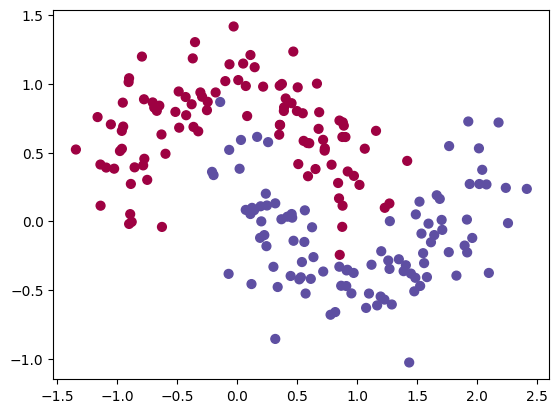

In [8]:
# Non linearly separable
plt.scatter(x[:, 0], x[:, 1], s=40, c=y, cmap=plt.cm.Spectral);

In [9]:
# convert into torch tensor
x = torch.FloatTensor(x)
y = torch.LongTensor(y)

In [10]:
x.shape, y.shape

(torch.Size([200, 2]), torch.Size([200]))

In [13]:
class FeedForward(nn.Module):

  def __init__(self, input_neurons, hidden_neurons, output_neurons):
    super(FeedForward, self).__init__()
    self.hidden = nn.Linear(input_neurons, hidden_neurons)
    self.out = nn.Linear(hidden_neurons, output_neurons)

  def forward(self, x):
    x = self.hidden(x)
    x = F.relu(x)
    x = self.out(x)
    return x

In [14]:
network = FeedForward(input_neurons=2, hidden_neurons=50, output_neurons=2)
optimizer = torch.optim.SGD(network.parameters(), lr=0.02)
loss_function = nn.CrossEntropyLoss()


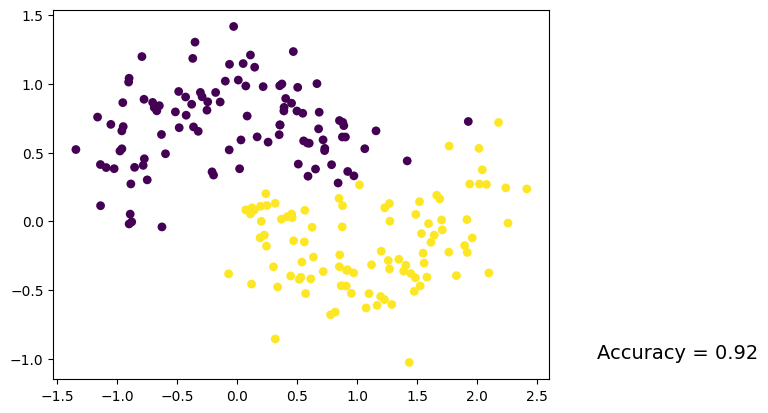

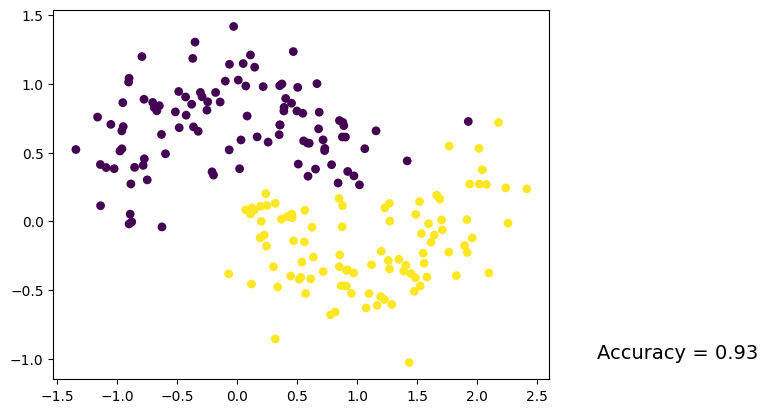

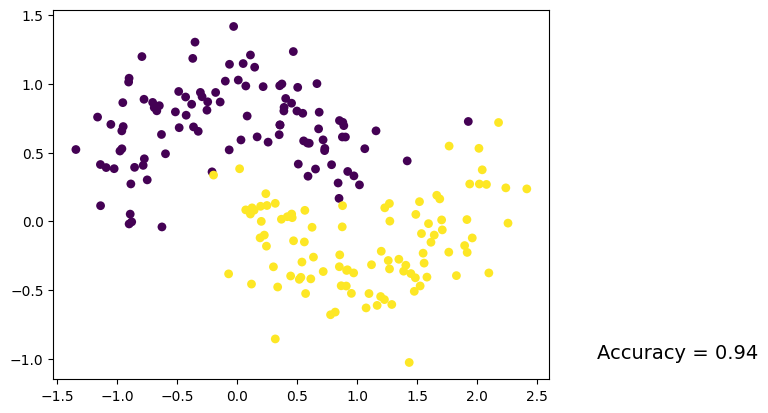

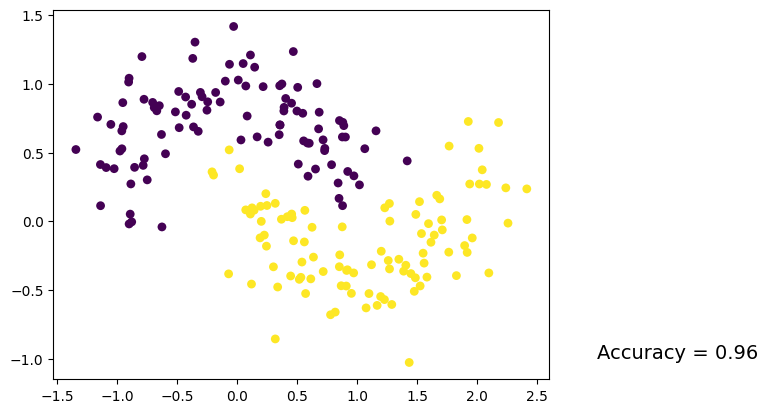

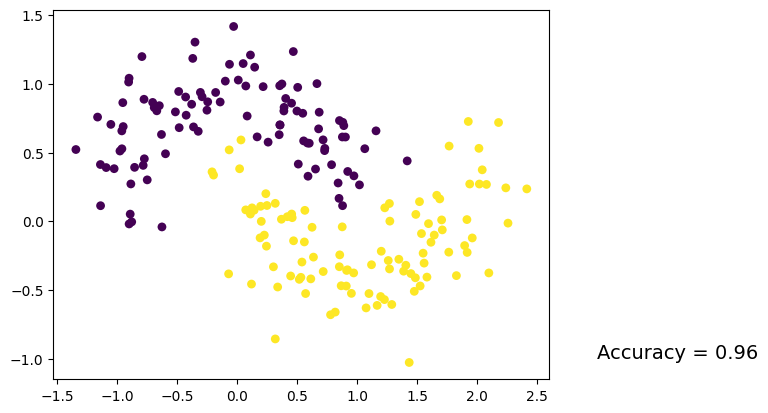

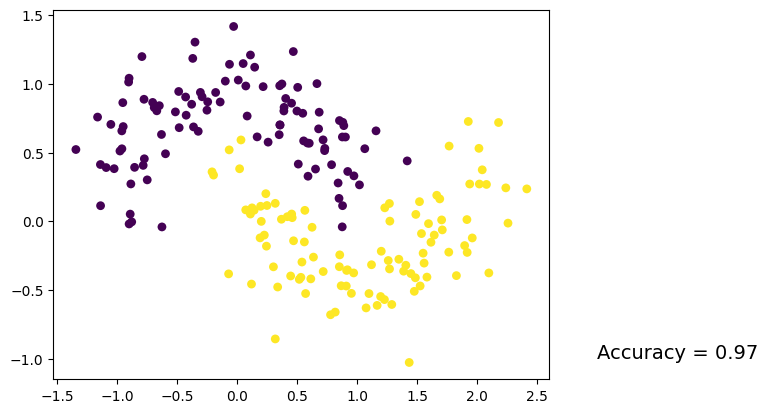

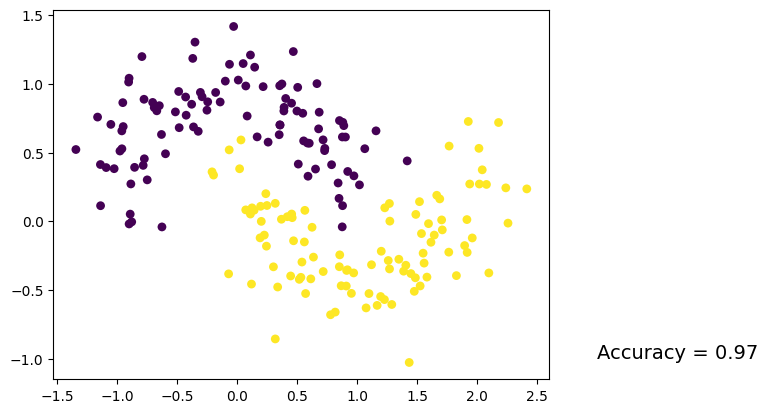

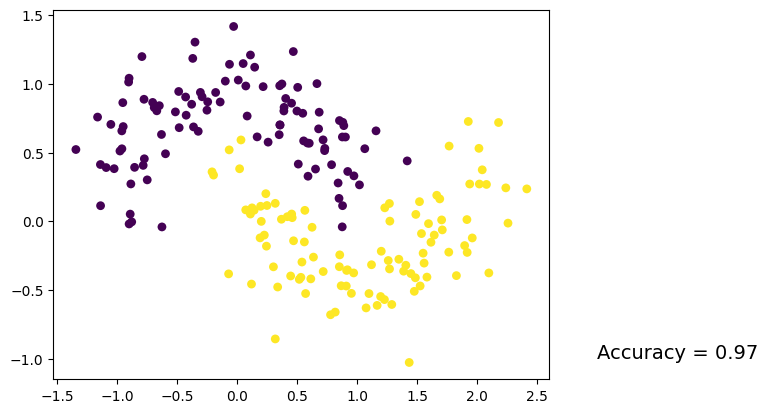

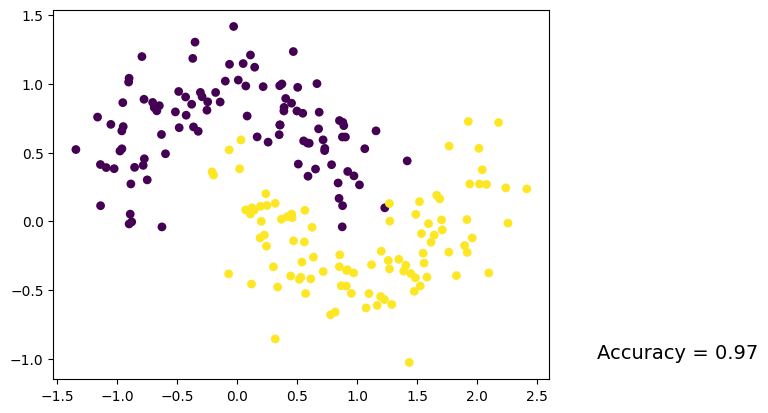

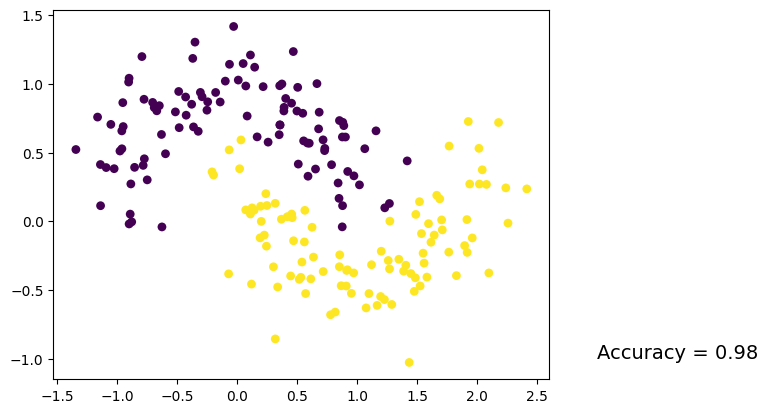

In [16]:
plt.ion()
for epoch in range(10000):
  out = network(x) # same as network.forward(x)
  loss = loss_function(out, y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if (epoch + 1) % 1000 == 0:
    # show the learning process until now
    max_value, prediction = torch.max(out, 1) # pred, axis
    predicted_y = prediction.data.numpy()
    target_y = y.data.numpy()
    plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], s=40, c=predicted_y, lw=0)
    accuracy = (predicted_y == target_y).mean()
    plt.text(3, -1, 'Accuracy = {:.2f}'.format(accuracy), fontdict={'size': 14})
    plt.pause(0.1)

plt.ioff()
plt.show()

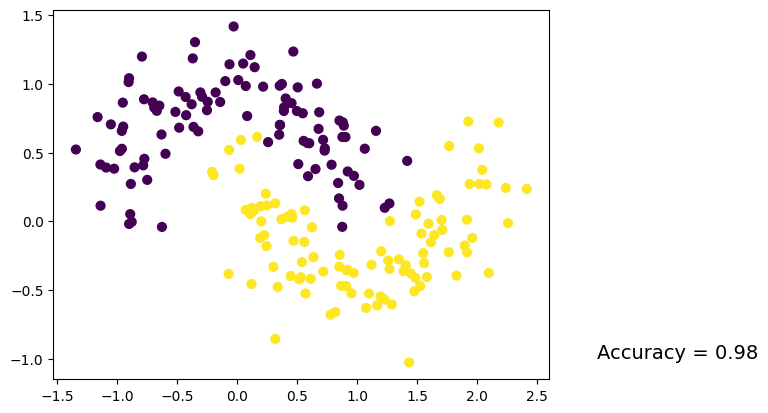

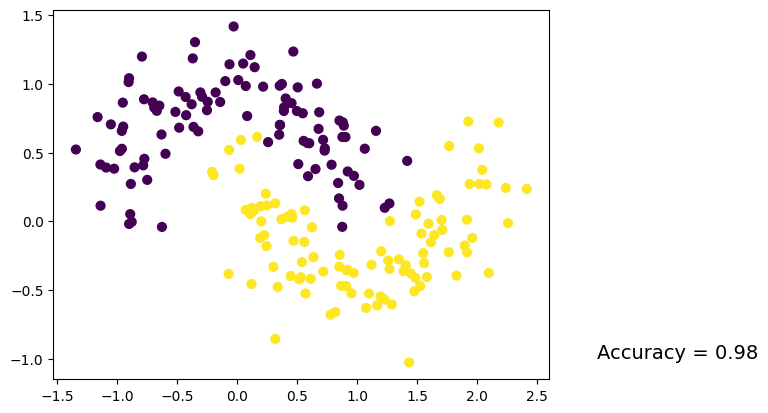

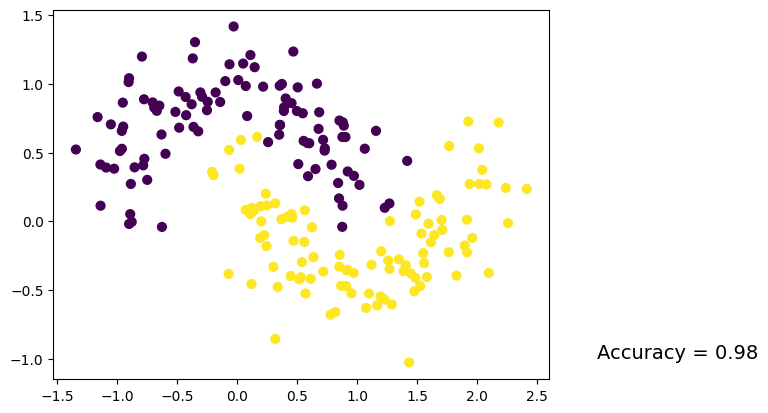

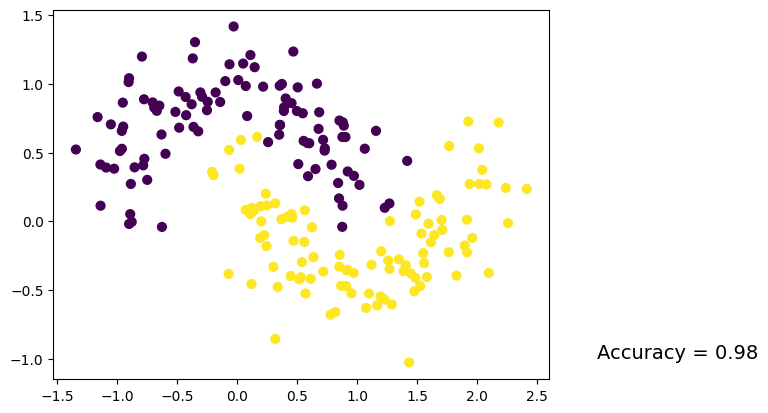

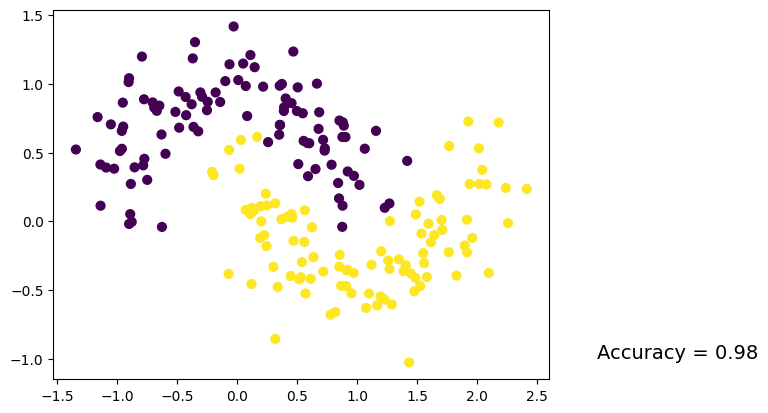

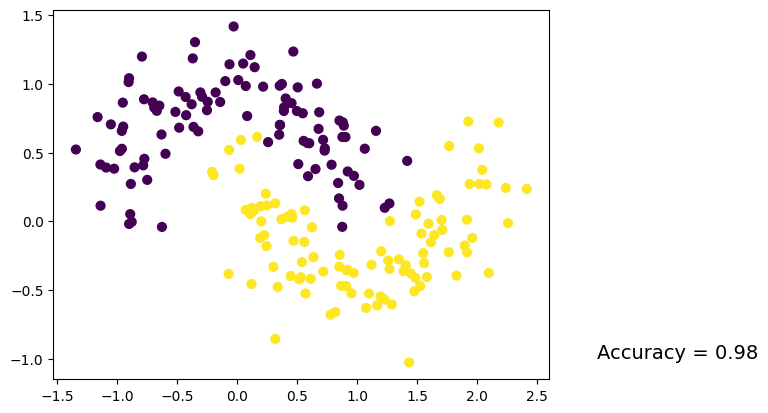

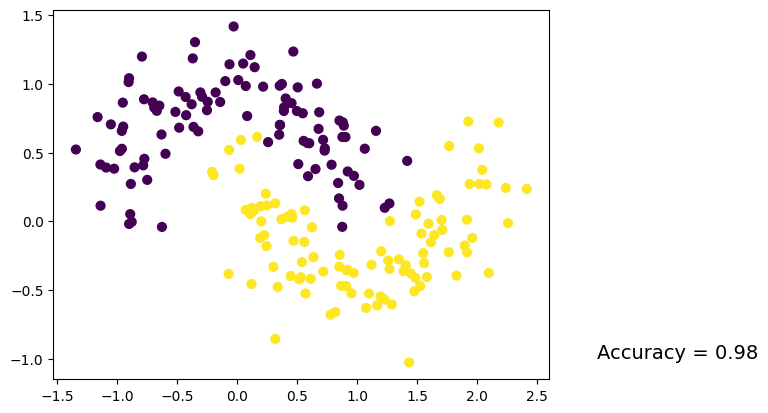

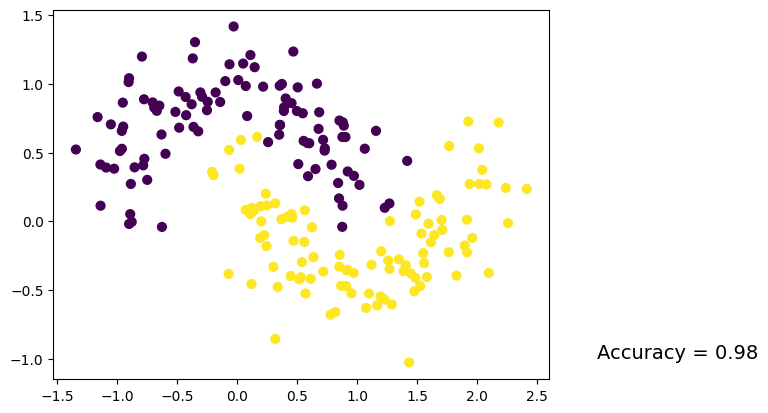

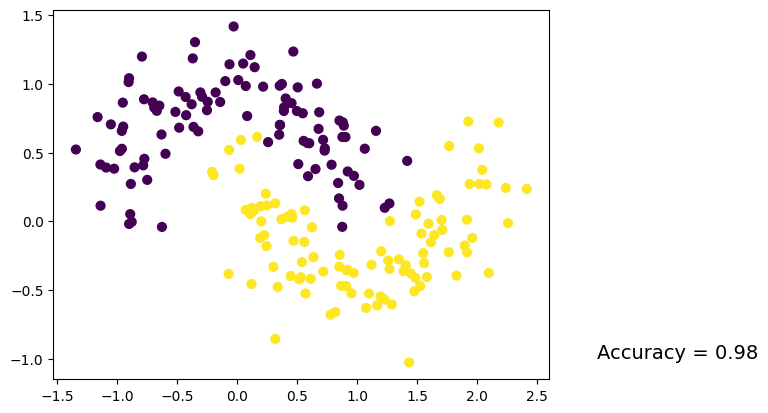

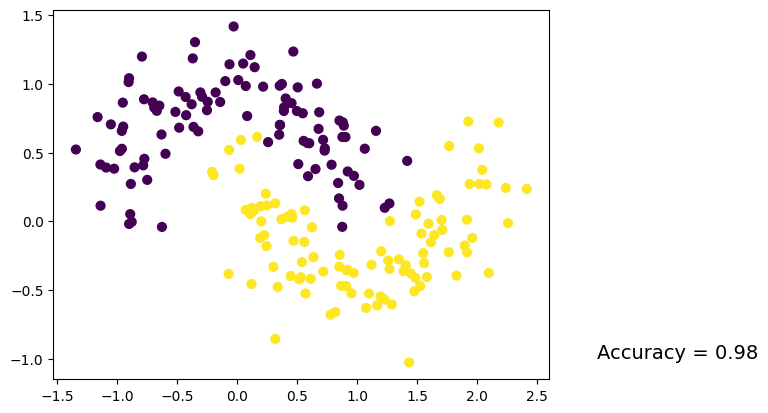

In [17]:
plt.ion()
for epoch in range(10000):
  out = network(x) # same as network.forward(x)
  loss = loss_function(out, y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if (epoch + 1) % 1000 == 0:
    # show the learning process until now
    max_value, prediction = torch.max(out, 1) # pred, axis
    predicted_y = prediction.data.numpy()
    target_y = y.data.numpy()
    plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], s=40, c=predicted_y, lw=1)
    accuracy = (predicted_y == target_y).mean()
    plt.text(3, -1, 'Accuracy = {:.2f}'.format(accuracy), fontdict={'size': 14})
    plt.pause(0.1)

plt.ioff()
plt.show()